In [189]:
import math
from pandas_datareader import data as wb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [356]:
#Get the stocks quote
stocks = wb.DataReader('TSLA', data_source = 'yahoo', start = '2000-01-01', end = '2022-05-30')

In [357]:
stocks

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000
2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000
2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000
2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000
2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000
...,...,...,...,...,...,...
2022-04-21,1092.219971,996.419983,1074.729980,1008.780029,35138800.0,1008.780029
2022-04-22,1034.849976,994.000000,1014.909973,1005.049988,23181600.0,1005.049988
2022-04-25,1008.619995,975.299988,978.969971,998.020020,22780400.0,998.020020


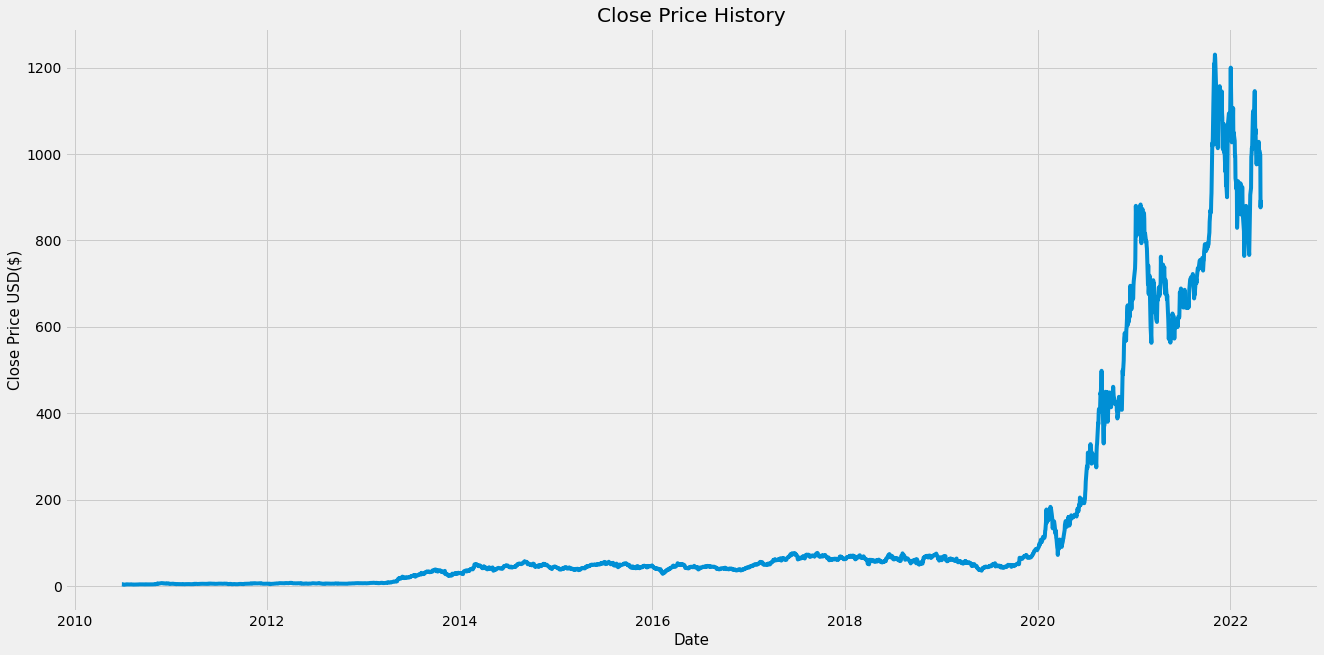

In [358]:
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(stocks['Close'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price USD($)', fontsize=15)
plt.show()

In [493]:
stk = stocks.filter(['Close'])
data = stk.values


training_data_len = math.ceil(len(data)* 0.75)
training_data_len

2235

In [494]:
print(stk)
print(data)

                  Close
Date                   
2010-06-29     4.778000
2010-06-30     4.766000
2010-07-01     4.392000
2010-07-02     3.840000
2010-07-06     3.222000
...                 ...
2022-04-21  1008.780029
2022-04-22  1005.049988
2022-04-25   998.020020
2022-04-26   876.419983
2022-04-27   893.727722

[2979 rows x 1 columns]
[[  4.77799988]
 [  4.76599979]
 [  4.3920002 ]
 ...
 [998.02001953]
 [876.41998291]
 [893.72772217]]


In [495]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [496]:
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.81097207],
       [0.71184835],
       [0.72595696]])

In [497]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
len(train_data)

train_data[0:61,0]

array([1.31893193e-03, 1.30914992e-03, 1.00427966e-03, 5.54310014e-04,
       5.05398786e-05, 0.00000000e+00, 2.70633795e-04, 2.60851783e-04,
       2.03790498e-04, 3.81495759e-04, 6.58650766e-04, 6.66802378e-04,
       7.89076560e-04, 9.96127858e-04, 7.33645675e-04, 7.20603251e-04,
       8.47768245e-04, 8.95047712e-04, 8.39616827e-04, 7.74403930e-04,
       8.02119373e-04, 7.41797482e-04, 6.74953990e-04, 8.34725821e-04,
       1.00264907e-03, 8.90156706e-04, 7.58100706e-04, 6.17892705e-04,
       6.19523105e-04, 5.26594571e-04, 3.42367904e-04, 2.93458231e-04,
       4.10841601e-04, 4.85836511e-04, 5.46158402e-04, 4.84206111e-04,
       4.87466717e-04, 5.38006790e-04, 7.05930233e-04, 5.54310014e-04,
       6.68432778e-04, 6.43977942e-04, 6.35826329e-04, 6.63541772e-04,
       5.99959081e-04, 7.58100706e-04, 8.57550257e-04, 8.55920051e-04,
       7.72773336e-04, 8.31465021e-04, 8.00489167e-04, 7.12451445e-04,
       8.02119373e-04, 8.67332270e-04, 1.00754008e-03, 8.37986621e-04,
      

In [498]:
for i in range(60, len(train_data),5):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i:i+5,0])
    if i<=70:
        print(x_train)
        print(y_train)
        print()

[array([1.31893193e-03, 1.30914992e-03, 1.00427966e-03, 5.54310014e-04,
       5.05398786e-05, 0.00000000e+00, 2.70633795e-04, 2.60851783e-04,
       2.03790498e-04, 3.81495759e-04, 6.58650766e-04, 6.66802378e-04,
       7.89076560e-04, 9.96127858e-04, 7.33645675e-04, 7.20603251e-04,
       8.47768245e-04, 8.95047712e-04, 8.39616827e-04, 7.74403930e-04,
       8.02119373e-04, 7.41797482e-04, 6.74953990e-04, 8.34725821e-04,
       1.00264907e-03, 8.90156706e-04, 7.58100706e-04, 6.17892705e-04,
       6.19523105e-04, 5.26594571e-04, 3.42367904e-04, 2.93458231e-04,
       4.10841601e-04, 4.85836511e-04, 5.46158402e-04, 4.84206111e-04,
       4.87466717e-04, 5.38006790e-04, 7.05930233e-04, 5.54310014e-04,
       6.68432778e-04, 6.43977942e-04, 6.35826329e-04, 6.63541772e-04,
       5.99959081e-04, 7.58100706e-04, 8.57550257e-04, 8.55920051e-04,
       7.72773336e-04, 8.31465021e-04, 8.00489167e-04, 7.12451445e-04,
       8.02119373e-04, 8.67332270e-04, 1.00754008e-03, 8.37986621e-04,
     

In [499]:
x_train[-1].shape

(60,)

In [500]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [501]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(435, 60, 1)

In [502]:
model = Sequential()
model.add(LSTM(30, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(30, return_sequences=False))
model.add(Dense(15))
model.add(Dense(5))

In [503]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [504]:
model.fit(x_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
435/435 [==============================] - 15s 25ms/step - loss: 5.5424e-05
Epoch 2/2
435/435 [==============================] - 11s 25ms/step - loss: 2.1447e-05


In [505]:
#scaler_data=np.append(scaled_data,arr)
#scaler_data = scaler_data.reshape(len(scaler_data),1)
#print(scaler_data)


In [506]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
#y_test = data[training_data_len: , : ]
for i in range(60, len(test_data),5):
    x_test.append(test_data[i-60:i , 0])

In [507]:
#y_test

In [533]:
x_test = np.array(x_test)
x_test.shape

(149, 60, 1)

In [523]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#y_test = np.reshape(y_test,(60,5))

In [528]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [529]:
#rmse = np.sqrt(np.mean(predictions - y_test)**2)
#print(rmse)
print(predictions.shape)
predictions = np.reshape(predictions,(745,1))
print(predictions.shape)

prediction = predictions[:len(predictions)-1]
prediction.shape

(149, 5)
(745, 1)


(744, 1)

In [530]:
train = stk[:training_data_len]
valid = stk[training_data_len:]
f = valid.append(pd.DataFrame(prediction, columns=valid.columns), ignore_index=True)

valid['Prediction'] = prediction



C:\Users\nikjo\AppData\Local\Temp/ipykernel_19808/4030890702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = prediction


In [531]:
valid

,Close,Prediction
Date,,
2019-05-16,45.666000,49.445057
2019-05-17,42.206001,46.918457
2019-05-20,41.071999,47.089024
2019-05-21,41.015999,46.551182
2019-05-22,38.546001,46.974075
...,...,...
2022-04-21,1008.780029,514.878723
2022-04-22,1005.049988,660.918091
2022-04-25,998.020020,694.159241


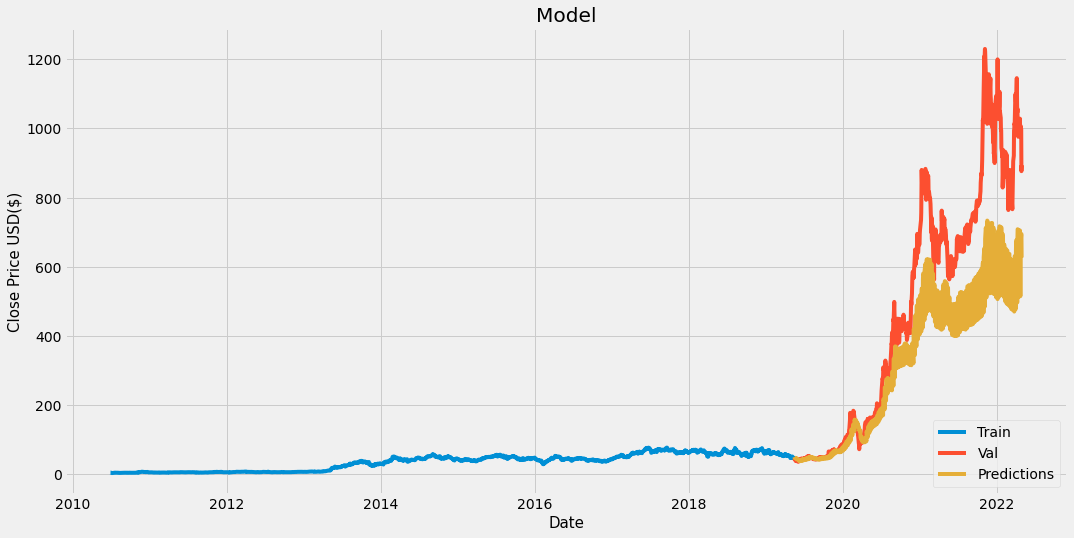

In [532]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Close Price USD($)', fontsize = 15)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Prediction'])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [520]:
#prediction of next four days
pred = predictions[-1]

In [521]:
pred

array([512.17706], dtype=float32)